NAME:-NEHA ASOLE
USN:-CS23011

ML LAB-6

AIM:-TO design and implement an Artifical Neural NEtwork
for classification problem ans evaluate its learning performance


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

path=("/content/drive/MyDrive/ML_Dataset/churn.csv")
df=pd.read_csv(path)
df.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.isnull().any().any()

np.False_

In [ ]:
df.isnull().sum

<bound method DataFrame.sum of       RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      False    False          False      False           False   
1      False    False          False      False           False   
2      False    False          False      False           False   
3      False    False          False      False           False   
4      False    False          False      False           False   
...      ...      ...            ...        ...             ...   
9995   False    False          False      False           False   
9996   False    False          False      False           False   
9997   False    False          False      False           False   
9998   False    False          False      False           False   
9999   False    False          False      False           False   

      EstimatedSalary  Exited  
0               False   False  
1               False   False  
2               False   False  
3               False   False  
4               False   False  
...               ...     ...  
9995            False   False  
9996            False   False  
9997            False   False  
9998            False   False  
9999            False   False  

[10000 rows x 14 columns]>

In [ ]:
df[df.isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
x=x.iloc[:,3:]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
x=pd.get_dummies(x,dtype=int)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [ ]:
x.shape

(10000, 13)

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((7000, 13), (3000, 13), (7000,), (3000,))

In [ ]:
#performing feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.34459497, -0.65674999, -0.34217046, ...,  1.73073215,
         1.09823226, -1.09823226],
       [-0.09518109, -0.46637979,  0.69816249, ..., -0.57779016,
         1.09823226, -1.09823226],
       [-0.94734518, -0.56156489,  0.35138484, ..., -0.57779016,
        -0.91055421,  0.91055421],
       ...,
       [ 0.86090545, -0.08563939, -1.38250341, ..., -0.57779016,
         1.09823226, -1.09823226],
       [ 0.15423279,  0.39028611,  1.04494014, ..., -0.57779016,
        -0.91055421,  0.91055421],
       [ 0.46600014,  1.1517669 , -1.38250341, ..., -0.57779016,
        -0.91055421,  0.91055421]])

In [ ]:
x_test

array([[-0.5836166 , -0.65674999, -0.68894811, ..., -0.57779016,
        -0.91055421,  0.91055421],
       [-0.30302599,  0.39028611, -1.38250341, ..., -0.57779016,
        -0.91055421,  0.91055421],
       [-0.53165538,  0.48547121, -0.34217046, ...,  1.73073215,
         1.09823226, -1.09823226],
       ...,
       [-0.44851742, -0.65674999,  0.69816249, ..., -0.57779016,
        -0.91055421,  0.91055421],
       [-0.74989252, -0.75193509, -1.03572576, ..., -0.57779016,
        -0.91055421,  0.91055421],
       [-1.23832804, -1.60860099,  1.73849544, ..., -0.57779016,
         1.09823226, -1.09823226]])

In [ ]:
#importing necessary librarries
import numpy as np
import tensorflow as tf

In [ ]:
#initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
#creating hidden layer
#adding first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#units:-no. of neurons that will be present in the respective layer
#Activation:- specify which activation function to be used

In [ ]:
#adding second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
#adding output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#sigmoid because it will give answer in 0 or 1 and as in out output Y Exited only two values i.e. 0 or 1 so we took only one neuron in output layer

In [ ]:
#compiling the ann
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#fitting the ANN to training set
ann.fit(x_train,y_train,batch_size=32,epochs=100)
#batch size means it will process the data in 32 32 32 ....batches
#epochs tells the nbo. of iteration , in iteration=1 it will be forward pass so if we get loss then using loss it will update the weights and do iteraton 2 or next iteration

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4994 - loss: 0.7805
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7848 - loss: 0.5152
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7878 - loss: 0.4662
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.4337
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.4066
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8333 - loss: 0.3952
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8373 - loss: 0.3871
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.3816
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8513 - loss: 0.3647
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8471 - loss: 0.3606
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.3561
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Accuracy Score Classification report and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

0.8653333333333333

In [ ]:
print('Confusion Matrix:')
cm=confusion_matrix(y_test,y_pred)

print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[2306  110]
 [ 294  290]]


In [ ]:
print(cm)

[[2306  110]
 [ 294  290]]


In [ ]:
print('classification report')
print(classification_report(y_test, y_pred))

classification report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2416
           1       0.72      0.50      0.59       584

    accuracy                           0.87      3000
   macro avg       0.81      0.73      0.75      3000
weighted avg       0.86      0.87      0.86      3000



<Axes: >

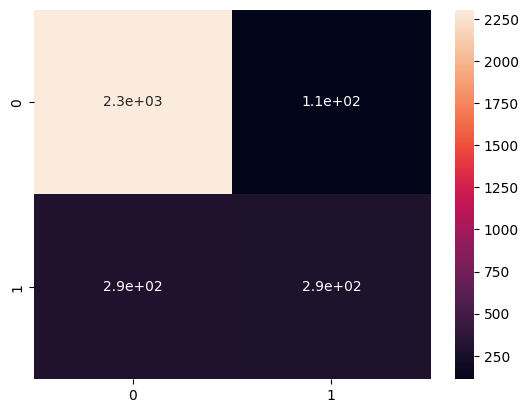

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True)